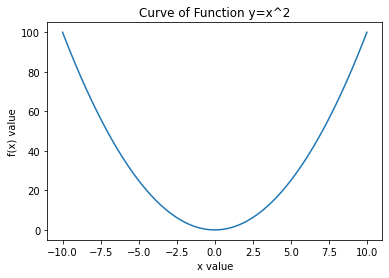

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot, y_plot)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Curve of Function y=x^2')
plt.show()

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
while True:
    # 计算梯度
    y0.backward()
    y = y0.item()  # 保存y0在当前迭代的取值，用于判断迭代的停止条件
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2
    # 检查是否满足结束条件
    if abs(y0.item() - y) < epsilon:
        break

y0.backward()
print("x0: ", x0, "y0: ", y0, "x0.grad: ", x0.grad)

x0:  tensor(0.0121, requires_grad=True) y0:  tensor(0.0001, grad_fn=<PowBackward0>) x0.grad:  tensor(0.0242)


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1

x_values = []
y_values = []

for _iter in range(8):
    x_values.append(x0.item())
    y_values.append(y0.item())
    # 计算梯度
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2

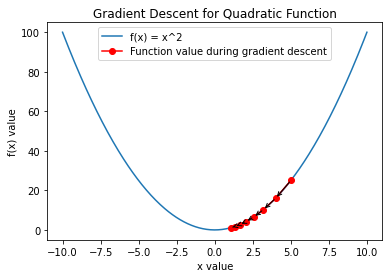

In [5]:
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot, y_plot, label='f(x) = x^2')
plt.plot(x_values, y_values, 'o-', label='Function value during gradient descent', color="red")

for i in range(1, len(x_values)):
    plt.annotate('', xy=(x_values[i], y_values[i]), xytext=(x_values[i-1], y_values[i-1]),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Gradient Descent for Quadratic Function')
plt.legend()
plt.show()

In [6]:
def target_func(x):
    return torch.sin(x)

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(0.0, requires_grad=True)

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
for _iter in range(5):
    # 计算梯度
    x_values.append(x0.item())
    y0 = target_func(x0)
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y_values.append(y0.item())

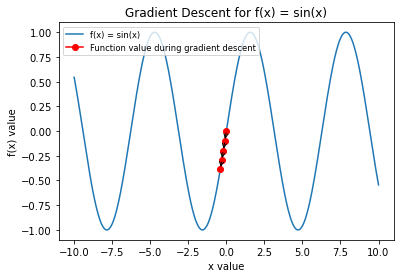

In [8]:
x_plot = torch.from_numpy(np.linspace(-10, 10, 500))
y_plot = target_func(x_plot)

# 绘制曲线
plt.plot(x_plot, y_plot, label='f(x) = sin(x)')
plt.plot(x_values, y_values, 'o-', label='Function value during gradient descent', color="red")

for i in range(1, len(x_values)):
    plt.annotate('', xy=(x_values[i], y_values[i]), xytext=(x_values[i-1], y_values[i-1]),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Gradient Descent for f(x) = sin(x)')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# 定义函数
def f(x, y):
    return ((4 - 2.1*x**2 + x**4 / 3.) * x**2 + x * y  + (-4 + 4*y**2) * y **2)

In [12]:
learning_rate = 0.1
num_iterations = 20
x0 = -1.0
y0 = -0.5
# 记录函数值
loss_values = []

x_values = [x0]
y_values = [y0]
# 执行梯度下降并记录函数值
x = torch.tensor(x0, requires_grad=True)
y = torch.tensor(y0, requires_grad=True)
for i in range(num_iterations):
    loss = f(x, y)
    loss_values.append(loss.item())
    loss.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()
    x_values.append(x.item())
    y_values.append(y.item())

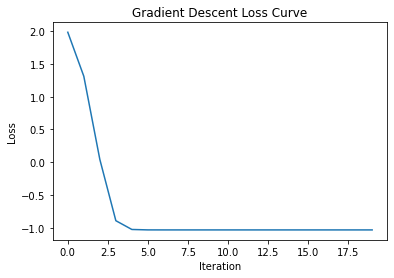

In [13]:
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

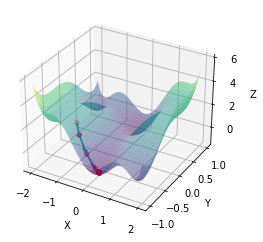

In [14]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.scatter(x_values, y_values, [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)], color='r')

for i in range(1, len(x_values)):
    x1, y1 = x_values[i-1], y_values[i-1]
    x2, y2 = x_values[i], y_values[i]
    u = x2 - x1
    v = y2 - y1
    w = f(x2, y2) - f(x1, y1)
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 构造数据
np.random.seed(0)
x = np.linspace(-10, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 20, 100)  # 添加噪声

# 转换为PyTorch张量
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

Epoch [100/1000], Loss: 403.4221
Epoch [200/1000], Loss: 403.3260
Epoch [300/1000], Loss: 403.3243
Epoch [400/1000], Loss: 403.3243
Epoch [500/1000], Loss: 403.3244
Epoch [600/1000], Loss: 403.3243
Epoch [700/1000], Loss: 403.3244
Epoch [800/1000], Loss: 403.3244
Epoch [900/1000], Loss: 403.3244
Epoch [1000/1000], Loss: 403.3244


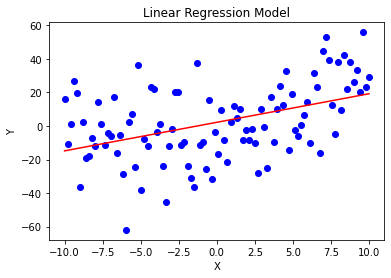

In [20]:
# 定义线性回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel()

# 定义损失函数（均方误差）
criterion = nn.MSELoss()

# 选择优化器（梯度下降）
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    predictions = model(x_tensor)
    loss = criterion(predictions, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 测试模型
with torch.no_grad():
    predicted = model(x_tensor)
    
plt.scatter(x, y, color='blue')  # 绘制原始数据点
plt.plot(x, predicted.numpy(), color='red')  # 绘制拟合直线
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Model')
plt.show()

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# 生成随机数据
X = np.random.rand(100, 1) * 10  # 100个样本，1个特征
y = (X > 5).astype(int)  # 标签为0或1

# 转换为PyTorch张量
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [23]:
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 输入特征数为1，输出特征数为1

    def forward(self, x):
        x = self.linear(x)
        return torch.sigmoid(x)  # 使用sigmoid函数将输出限制在0和1之间

In [24]:
model = LogisticRegressionModel()
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降

# 训练模型
for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6779
Epoch [200/1000], Loss: 0.6350
Epoch [300/1000], Loss: 0.5964
Epoch [400/1000], Loss: 0.5619
Epoch [500/1000], Loss: 0.5310
Epoch [600/1000], Loss: 0.5033
Epoch [700/1000], Loss: 0.4784
Epoch [800/1000], Loss: 0.4561
Epoch [900/1000], Loss: 0.4359
Epoch [1000/1000], Loss: 0.4177


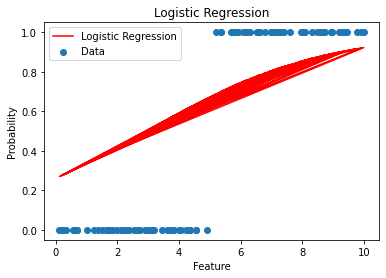

In [25]:
model.eval()
with torch.no_grad():
    predictions = model(X_train).numpy()

plt.scatter(X, y, label='Data')
plt.plot(X, predictions, color='r', label='Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.legend()
plt.show()